In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Datasets/all_diseases.csv.gz")

In [4]:
df.head()

,country,date,year,month,transmission_mode,no_cases,no_deaths,cumulative_cases,cumulative_deaths,disease,week
0,Afghanistan,2020-01-22,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
1,Afghanistan,2020-01-23,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
2,Afghanistan,2020-01-24,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
3,Afghanistan,2020-01-25,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4
4,Afghanistan,2020-01-26,2020,1,air,0.0,0.0,0.0,0.0,covid-19,4


In [5]:
df.loc[(df.disease.isin(['dengue'])) & 
       (df.no_cases.isin([-45491.0])), 
       'no_cases'] = 45491.0

In [6]:
df.loc[df.disease.isin(['dengue']) & df.no_cases.isin([45491.0])]

,country,date,year,month,transmission_mode,no_cases,no_deaths,cumulative_cases,cumulative_deaths,disease,week
162774,Brazil,2018-08-05,2018,8,mosquito,45491.0,5.0,193898.0,92.0,dengue,31


In [7]:
x = df[['date', 'no_cases']].set_index('date')
x = x.dropna(how='all')
print(x)

            no_cases
date                
2020-01-22       0.0
2020-01-23       0.0
2020-01-24       0.0
2020-01-25       0.0
2020-01-26       0.0
...              ...
2000-12-31       0.0
2000-12-31       0.0
2000-12-31       0.0
2000-12-31       0.0
2000-12-31       0.0

[172952 rows x 1 columns]


In [8]:
df.country.value_counts()

China                   19160
Canada                   9383
United Kingdom           6756
France                   6756
Australia                4504
                        ...  
Turkmenistan               14
North Korea                11
Congo                      10
Côte d'Ivoire              10
Syrian Arab Republic       10
Name: country, Length: 221, dtype: int64

In [9]:
df[df.country.str.lower().str.contains('america')].country.value_counts()

United States of America    938
Name: country, dtype: int64

In [10]:
us_data = df[df.country.str.lower().str.contains('america')]

In [11]:
us_data.date = pd.to_datetime(us_data.date)


In [12]:
us_data.date.dtype

dtype('<M8[ns]')

In [13]:
us_data.date.head()

143002   2020-01-22
143003   2020-01-23
143004   2020-01-24
143005   2020-01-25
143006   2020-01-26
Name: date, dtype: datetime64[ns]

In [14]:
cases_per_date = us_data.groupby(us_data.date.dt.to_period("M"))["no_cases"].sum().to_frame()

In [15]:
cases_per_date.index.to_timestamp()

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
      

In [16]:
cases_per_date.index = pd.to_datetime(cases_per_date.index.to_timestamp())

In [17]:
model_fit = ARIMA(cases_per_date, order=(1,1,1))
fit = model_fit.fit()

In [18]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               no_cases   No. Observations:                   80
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1157.977
Date:                Sat, 07 Aug 2021   AIC                           2321.954
Time:                        13:34:47   BIC                           2329.062
Sample:                    01-01-2015   HQIC                          2324.802
                         - 08-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0571      0.195     -0.293      0.770      -0.439       0.325
ma.L1          0.5112      0.206      2.481      0.013       0.107       0.915
sigma2      3.427e+11   1.57e-12   2.19e+23      0.000    3.43e+11    3.43e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1279.89
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):       216386381.53   Skew:                            -1.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.96e+38. Standard errors may be unstable.
"""

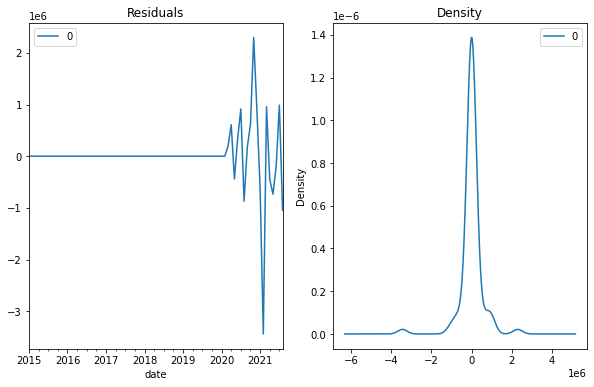

In [19]:
residuals = pd.DataFrame(fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

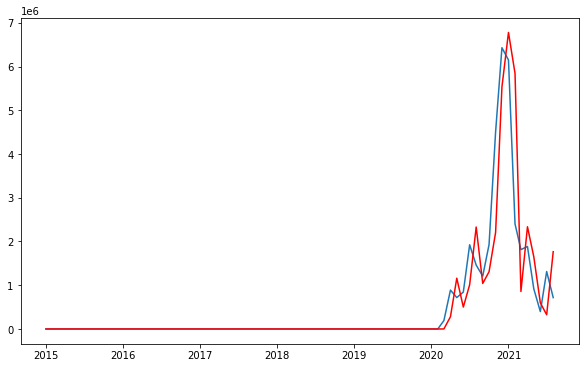

In [20]:
plt.plot(cases_per_date)
plt.plot(fit.fittedvalues, color='red')

In [21]:

# Mean Absolute Percentage Error (MAPE)
# Mean Error (ME)
# Mean Absolute Error (MAE)
# Mean Percentage Error (MPE)
# Root Mean Squared Error (RMSE)
# Lag 1 Autocorrelation of Error (ACF1)
# Correlation between the Actual and the Forecast (corr)
# Min-Max Error (minmax)



def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
#     acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
#             'acf1':acf1, 
            'corr':corr, 'minmax':minmax})


In [22]:
forecast_accuracy(fit.fittedvalues, cases_per_date.no_cases)

{'mape': inf,
 'me': -2117.2954483037697,
 'mae': 197592.89580702316,
 'mpe': inf,
 'rmse': 557110.8369596237,
 'corr': 0.895576712272234,
 'minmax': 0.5084142702344047}

# Modeling with the Brazil country

In [23]:
brazil_data_dengue = df[df.country.str.lower().str.contains('brazil') &
                        df.disease.isin(['dengue'])]
brazil_data_dengue.date = pd.to_datetime(brazil_data_dengue.date)

In [24]:
brazil_data_dengue[brazil_data_dengue.date.dt.year.isin([2018]) &
                   brazil_data_dengue.date.dt.month.isin([7,8])]

,country,date,year,month,transmission_mode,no_cases,no_deaths,cumulative_cases,cumulative_deaths,disease,week
162772,Brazil,2018-07-08,2018,7,mosquito,10225.0,3.0,181807.0,80.0,dengue,27
162773,Brazil,2018-07-22,2018,7,mosquito,57582.0,7.0,239389.0,87.0,dengue,29
162774,Brazil,2018-08-05,2018,8,mosquito,45491.0,5.0,193898.0,92.0,dengue,31
162775,Brazil,2018-08-19,2018,8,mosquito,4886.0,8.0,198784.0,100.0,dengue,33


In [166]:
import datetime
from dateutil.relativedelta import relativedelta

start = datetime.datetime.strptime("2021-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,6)]
# date_list = ['2021-01-03', '2021-01-10','2021-01-17','2021-01-24','2021-01-31',
#              '2021-02-07', '2021-02-14', '2021-02-21']


test_df = pd.DataFrame(date_list, columns= ['date'])
test_df.date = pd.to_datetime(test_df.date)
test_df['no_cases'] = np.nan
test_df = test_df.fillna(0)

In [167]:
date_list

[datetime.datetime(2021, 1, 1, 0, 0),
 datetime.datetime(2021, 2, 1, 0, 0),
 datetime.datetime(2021, 3, 1, 0, 0),
 datetime.datetime(2021, 4, 1, 0, 0),
 datetime.datetime(2021, 5, 1, 0, 0),
 datetime.datetime(2021, 6, 1, 0, 0)]

In [168]:
test_df.dtypes

date        datetime64[ns]
no_cases           float64
dtype: object

In [193]:
fit_data = pd.concat([brazil_data_dengue[['date','no_cases']], test_df])
train_data = fit_data[(fit_data.date >= pd.to_datetime('2015-01-01')) & 
                      (fit_data.date <= pd.to_datetime('2019-12-31'))].set_index('date')

predict_data = fit_data[fit_data.date.dt.year.isin([2019, 2020,2021])].set_index('date')

In [194]:
train_data.head()

,no_cases
date,
2015-01-04,11401.0
2015-01-11,15181.0
2015-01-18,23275.0
2015-01-25,29184.0
2015-02-01,37411.0


## Using the auto arima

In [195]:
from pmdarima.arima import auto_arima

In [196]:
auto_arima_model = auto_arima(train_data[['no_cases']].fillna(method="bfill"), random_state=42)
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  243
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -2494.089
Date:                Sat, 07 Aug 2021   AIC                           4998.178
Time:                        14:38:37   BIC                           5015.644
Sample:                             0   HQIC                          5005.213
                                - 243                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    464.1858    248.861      1.865      0.062     -23.572     951.943
ar.L1          1.8809      0.087     21.526      0.000       1.710       2.052
ar.L2         -0.9003      0.085    -10.550      0.000      -1.068      -0.733
ma.L1         -0.7366      0.110     -6.680      0.000      -0.953      -0.520
sigma2      4.919e+07      0.009    5.4e+09      0.000    4.92e+07    4.92e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.49   Jarque-Bera (JB):              4304.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                             1.37
Prob(H) (two-sided):                  0.03   Kurtosis:                        23.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.51e+26. Standard errors may be unstable.
"""

In [197]:
auto_arimaprediction = pd.DataFrame(auto_arima_model.predict(len(predict_data)),index=predict_data.index)
auto_arimaprediction.columns = ['Predicted']

In [198]:
auto_arimaprediction.head()

,Predicted
date,
2019-01-06,23211.441248
2019-01-13,25356.686075
2019-01-20,27260.260030
2019-01-27,28909.319228
2019-02-03,30297.238574


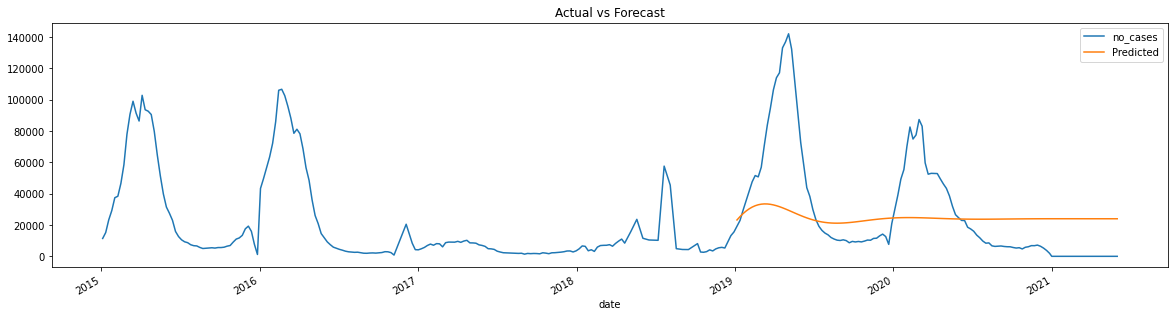

In [199]:
ax = fit_data.set_index('date').plot(y='no_cases',figsize=(20,5),title='Auto Arima Actual Vs Forecasted')
auto_arimaprediction.plot(y='Predicted',figsize=(20,5),title='Actual vs Forecast', ax=ax)

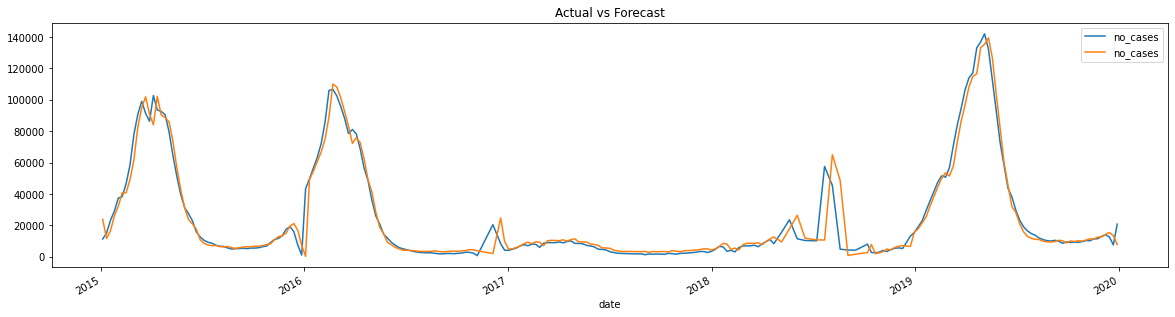

In [200]:
# Checking model fit on train data

trainfitpredict = pd.DataFrame(auto_arima_model.predict_in_sample(), index=train_data.index)
trainfitpredict.columns = ['no_cases']

ax = train_data.plot(y='no_cases',figsize=(20,5),title='Actual Vs Forecasted')
trainfitpredict.plot(y='no_cases',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [201]:
trainfitpredict.head()

,no_cases
date,
2015-01-04,23923.100603
2015-01-11,11750.062135
2015-01-18,16658.753563
2015-01-25,26115.100039
2015-02-01,32240.962626


# Classic Arima

In [202]:
def aic_for_orders(train, pdq_values):
    train = train.astype('float32')
    ordersaic_d = {}
    for current_pdq in pdq_values:
        cur_model = ARIMA(train, order=current_pdq)
        cur_results = cur_model.fit()
        cur_aic = cur_results.aic
        ordersaic_d[current_pdq] = cur_aic
    return ordersaic_d

def get_arima_predictions(train, test, order):
    predictions = list()
    for step in range(len(test)):
        model = ARIMA(train,order=order)
        fit_model = model.fit()
        prediction = fit_model.forecast().values[0]
        timestamp = test.index[step]
        predictions.append((timestamp, prediction))
        train = train.append(test.iloc[step])
    preds_frame = pd.DataFrame(predictions).set_index([0]).rename(columns={1:'Predictions'})
    return (preds_frame, fit_model)

In [203]:
import itertools

In [204]:
p = d = q = range(0,4)
pdqlist = list(itertools.product(p, d, q))
newordersaic_d = aic_for_orders(train=train_data[['no_cases']].fillna(method="bfill"), pdq_values=pdqlist)

In [205]:
p

range(0, 4)

[Text(0, 0.5, '%'),
 Text(0.5, 0, 'orders'),
 Text(0.5, 1.0, 'pdq values and aic scores')]

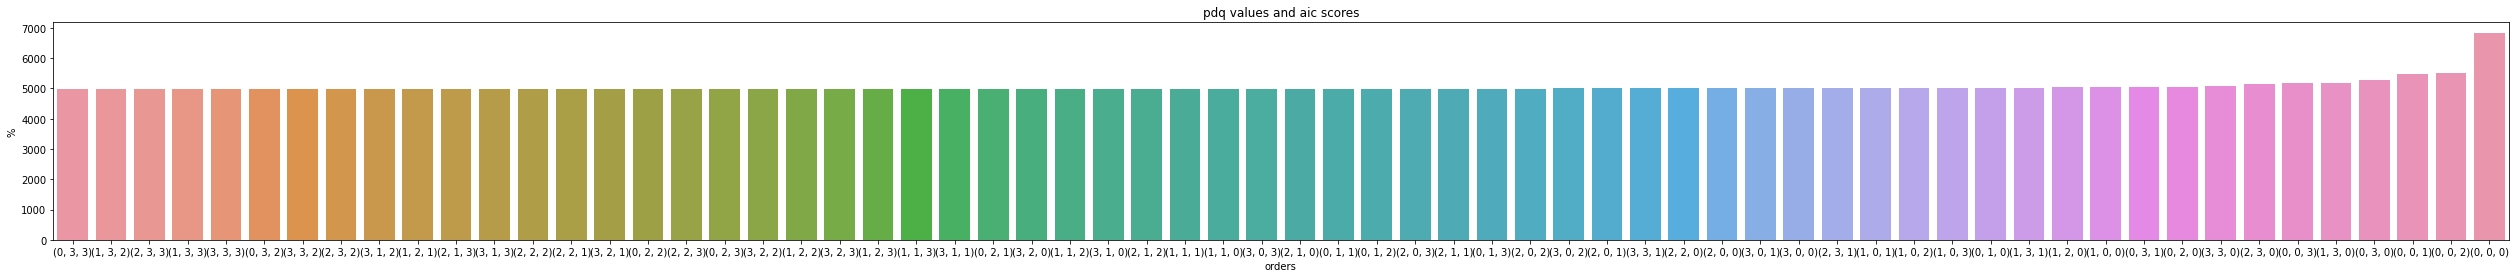

In [206]:
orders_andaic = pd.DataFrame(newordersaic_d.items(),columns=['orders','aic']).sort_values(by='aic',ascending=True)

fig_dims = (44, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='orders', y='aic', data=orders_andaic)
ax.set(xlabel = 'orders', ylabel='%', title='pdq values and aic scores')

In [207]:
pd.Series(['a']).values[0]

'a'

In [208]:
orders_andaic.head()

,orders,aic
15,"(0, 3, 3)",4969.114842
30,"(1, 3, 2)",4970.697715
47,"(2, 3, 3)",4970.831288
31,"(1, 3, 3)",4971.636807
63,"(3, 3, 3)",4972.997451


In [209]:
arima_test_predictions, fit_model = get_arima_predictions(train_data[['no_cases']],
                                               predict_data[['no_cases']],
                                              order=(0,3,3))

In [210]:
arima_test_predictions.tail(10)

,Predictions
0,
2020-12-06,7379.451721
2020-12-13,6104.933808
2020-12-20,4709.625622
2020-12-27,2931.447153
2021-01-01,739.495849
2021-02-01,-1318.764570
2021-03-01,-557.247269
2021-04-01,-571.757606
2021-05-01,-425.457646


In [211]:
arima_test_predictions.dtypes

Predictions    float64
dtype: object

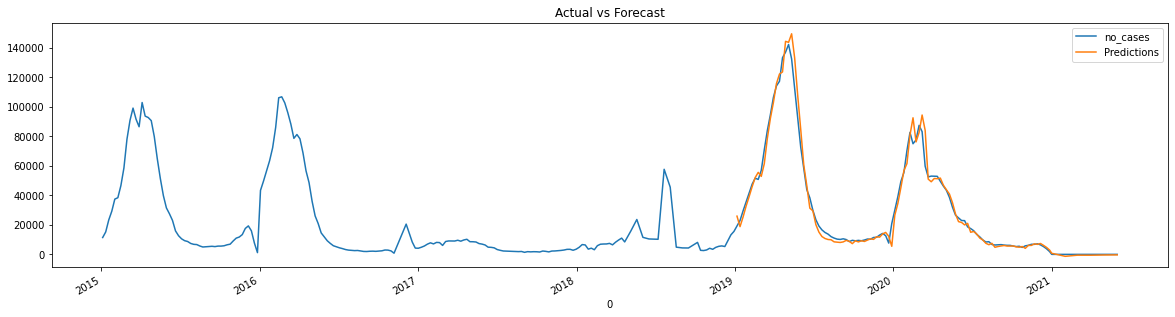

In [212]:
ax = fit_data.set_index('date').plot(y='no_cases',figsize=(20,5),title='Actual Vs Forecasted')
arima_test_predictions.plot(y='Predictions',figsize=(20,5),title='Actual vs Forecast', ax=ax)

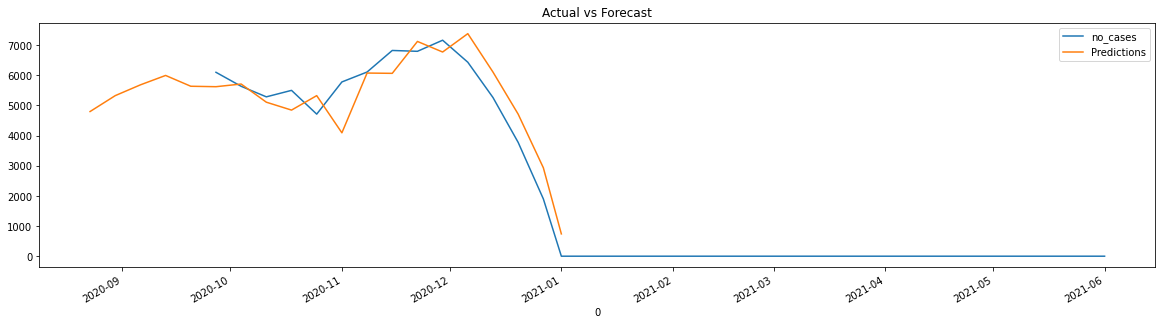

In [213]:
ax = fit_data.tail(20).set_index('date').plot(y='no_cases',figsize=(20,5),title='Actual Vs Forecasted')
arima_test_predictions_bla = arima_test_predictions[arima_test_predictions.Predictions > 0].tail(20)
arima_test_predictions_bla.plot(y='Predictions',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [214]:
fit_data.tail(20)

,date,no_cases
162880,2020-09-27,6098.0
162881,2020-10-04,5634.0
162882,2020-10-11,5284.0
162883,2020-10-18,5499.0
162884,2020-10-25,4711.0
162885,2020-11-01,5778.0
162886,2020-11-08,6107.0
162887,2020-11-15,6822.0
162888,2020-11-22,6794.0
162889,2020-11-29,7162.0


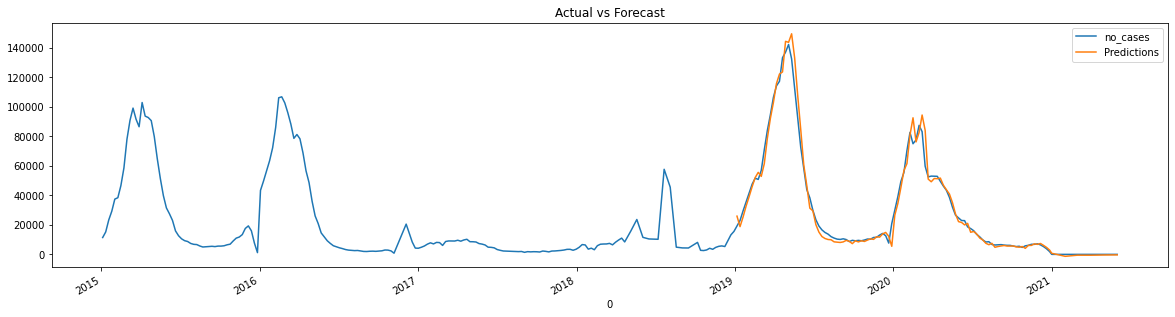

In [215]:
ax = fit_data.set_index('date').plot(y='no_cases',figsize=(20,5),title='Actual Vs Forecasted')
arima_test_predictions.plot(y='Predictions',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [216]:
assert False

AssertionError: 

In [ ]:
arima_test_predictions.tail()

In [ ]:
forecast_accuracy(arima_test_predictions['Predictions'], predict_data['no_cases'])

## COVID ARIMA for Brazil

In [ ]:
brazil_data_covid = df[df.country.str.lower().str.contains('brazil') &
                       df.disease.isin(['covid-19'])]

brazil_data_covid.date = pd.to_datetime(brazil_data_covid.date)

In [ ]:
fit_data = brazil_data_covid[['date','no_cases']]
train_data = fit_data[(fit_data.date.dt.year.isin([2020])) &
                      (fit_data.date.dt.month>5)].set_index('date')

predict_data = fit_data[fit_data.date.dt.year.isin([2021])].set_index('date')

In [ ]:
train_data.head()

In [ ]:
auto_arima_model = auto_arima(train_data[['no_cases']].fillna(method="bfill"), random_state=42)
auto_arima_model.summary()

In [ ]:
auto_arimaprediction = pd.DataFrame(auto_arima_model.predict(len(predict_data)),index=predict_data.index)
auto_arimaprediction.columns = ['Predicted']

ax = fit_data.set_index('date').plot(y='no_cases',figsize=(20,5),title='Auto Arima Actual Vs Forecasted')
auto_arimaprediction.plot(y='Predicted',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
# Checking model fit on train data

trainfitpredict = pd.DataFrame(auto_arima_model.predict_in_sample(), index=train_data.index)
trainfitpredict.columns = ['no_cases']

ax = train_data.plot(y='no_cases',figsize=(20,5),title='Actual Vs Forecasted')
trainfitpredict.plot(y='no_cases',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
p = d = q = range(0,3)
pdqlist = list(itertools.product(p, d, q))
newordersaic_d = aic_for_orders(train=train_data.no_cases, pdq_values=pdqlist)

In [ ]:
orders_andaic = pd.DataFrame(newordersaic_d.items(),columns=['orders','aic']).sort_values(by='aic',ascending=True)

fig_dims = (44, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='orders', y='aic', data=orders_andaic)
ax.set(xlabel = 'orders', ylabel='%', title='pdq values and aic scores')

In [ ]:
arima_test_predictions = get_arima_predictions(train_data[['no_cases']],
                                               predict_data[['no_cases']],
                                              order=(0,2,3))

In [ ]:
ax = fit_data.set_index('date').plot(y='no_cases',figsize=(20,5),title='Actual Vs Forecasted')
arima_test_predictions.plot(y='Predictions',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
forecast_accuracy(arima_test_predictions['Predictions'], predict_data['no_cases'])

## ZIKA ARIMA for Brazil

In [ ]:
brazil_data_zika = df[df.country.str.lower().str.contains('brazil') &
                       df.disease.isin(['zika'])]

brazil_data_zika.date = pd.to_datetime(brazil_data_zika.date)

In [ ]:
fit_data = brazil_data_zika[['date','no_cases']]
train_data = fit_data[(fit_data.date >= pd.to_datetime('2016-11-01')) &
                      (fit_data.date <= pd.to_datetime('2017-08-31'))].set_index('date')

predict_data = fit_data[(fit_data.date >= pd.to_datetime('2017-09-01')) &
                        (fit_data.date <= pd.to_datetime('2017-12-31'))].set_index('date')

In [ ]:
auto_arima_model = auto_arima(train_data[['no_cases']].fillna(method="bfill"), random_state=42)
auto_arima_model.summary()

In [ ]:
auto_arimaprediction = pd.DataFrame(auto_arima_model.predict(len(predict_data)),index=predict_data.index)
auto_arimaprediction.columns = ['Predicted']

ax = fit_data.set_index('date').plot(y='no_cases',figsize=(20,5),title='Auto Arima Actual Vs Forecasted')
auto_arimaprediction.plot(y='Predicted',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
# Checking model fit on train data

trainfitpredict = pd.DataFrame(auto_arima_model.predict_in_sample(), index=train_data.index)
trainfitpredict.columns = ['no_cases']

ax = train_data.plot(y='no_cases',figsize=(20,5),title='Actual Vs Forecasted')
trainfitpredict.plot(y='no_cases',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
p = d = q = range(0,3)
pdqlist = list(itertools.product(p, d, q))
newordersaic_d = aic_for_orders(train=train_data.no_cases, pdq_values=pdqlist)

In [ ]:
orders_andaic = pd.DataFrame(newordersaic_d.items(),columns=['orders','aic']).sort_values(by='aic',ascending=True)

fig_dims = (44, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='orders', y='aic', data=orders_andaic)
ax.set(xlabel = 'orders', ylabel='%', title='pdq values and aic scores')

In [ ]:
arima_test_predictions = get_arima_predictions(train_data[['no_cases']],
                                               predict_data[['no_cases']],
                                              order=(1,0,2))

In [ ]:
ax = fit_data.set_index('date').plot(y='no_cases',figsize=(20,5),title='Actual Vs Forecasted')
arima_test_predictions.plot(y='Predictions',figsize=(20,5),title='Actual vs Forecast', ax=ax)

In [ ]:
forecast_accuracy(arima_test_predictions['Predictions'], predict_data['no_cases'])

In [ ]:
arima_test_predictions['Predictions'].tail()